The analysis of cosmetic products. The dataset comes from http://makeup-api.herokuapp.com/. 

Variables:
* Brand(text: name of the brand)
* Category(text: category of products)
* Currency(text)
* Description (text: product description)
* Id (numeric)
* Name(numeric: name of the product)
* Price(numeric: product price)
* Price sign(text)
* Product type(text)
* Rating(numeric)
* Tag list(text)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:\Python Scripts\API_data analyst\products_final.csv', header=0,index_col=0)
df.head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


### Data exploration
##### First observations

In [3]:
# data type
df.dtypes

brand            object
category         object
currency         object
description      object
id                int64
name             object
price           float64
price_sign       object
product_type     object
rating          float64
tag_list         object
dtype: object

In [4]:
#information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 11 columns):
brand           919 non-null object
category        507 non-null object
currency        368 non-null object
description     906 non-null object
id              931 non-null int64
name            931 non-null object
price           917 non-null float64
price_sign      368 non-null object
product_type    931 non-null object
rating          340 non-null float64
tag_list        931 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 87.3+ KB


In [5]:
df.shape

(931, 11)

In [6]:
df.columns

Index(['brand', 'category', 'currency', 'description', 'id', 'name', 'price',
       'price_sign', 'product_type', 'rating', 'tag_list'],
      dtype='object')

In [7]:
# delate diplicate rows
df.drop_duplicates(inplace=True)

Cheack missing data

In [8]:
df.isnull().sum()  

brand            12
category        424
currency        563
description      25
id                0
name              0
price            14
price_sign      563
product_type      0
rating          591
tag_list          0
dtype: int64

In [9]:
# observations with missing data
df[df.isnull().any(axis=1)].head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


List on unique names in each column

In [10]:
df['category'].unique()

array(['pencil', 'lipstick', 'liquid', nan, 'powder', 'lip_gloss', 'gel',
       'cream', 'palette', 'concealer', 'highlighter', 'bb_cc', 'contour',
       'lip_stain', 'mineral'], dtype=object)

List on unique values:

In [11]:
df['rating'].unique()

array([nan, 5. , 4. , 4.7, 4.5, 2.5, 4.6, 4.4, 3. , 3.8, 4.8, 3.3, 4.9,
       4.3, 2. , 2.3, 4.2, 3.5, 3.7, 3.9, 4.1, 2.6, 3.6, 3.4, 1.5, 3.2,
       3.1])

In [3]:
df['brand'].unique()

array(['colourpop', 'boosh', 'deciem', 'zorah biocosmetiques',
       'w3llpeople', "sally b's skin yummies", 'rejuva minerals',
       'penny lane organics', 'nudus', 'marienatie',
       "maia's mineral galaxy", 'lotus cosmetics usa', 'green people',
       'coastal classic creation', "c'est moi", 'alva', 'glossier', 'nyx',
       'fenty', 'clinique', 'dior', 'iman', 'benefit', 'smashbox',
       'marcelle', 'stila', 'mineral fusion', nan, 'annabelle',
       'dr. hauschka', 'physicians formula', 'cargo cosmetics',
       'covergirl', 'e.l.f.', 'maybelline', 'almay', 'milani',
       'pure anada', "l'oreal", 'sante', 'revlon', 'anna sui',
       'wet n wild', 'pacifica', 'mistura', 'zorah', 'suncoat', 'moov',
       'misa', 'salon perfect', 'orly', 'china glaze', 'essie',
       'butter london', 'sinful colours', 'piggy paint', 'dalish',
       "burt's bees"], dtype=object)

In [4]:
df['product_type'].unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

In [12]:
df['tag_list'].unique()

array(["['Vegan', 'cruelty free']", "['Organic', 'Chemical Free']",
       "['Gluten Free', 'Vegan', 'silicone free', 'oil free', 'alcohol free', 'cruelty free', 'water free']",
       "['EcoCert', 'purpicks']",
       "['Gluten Free', 'EWG Verified', 'purpicks']",
       "['EWG Verified', 'purpicks']",
       "['No Talc', 'Hypoallergenic', 'EWG Verified', 'purpicks']",
       "['Organic', 'Vegan', 'EWG Verified', 'purpicks']",
       "['Gluten Free', 'Vegan', 'EWG Verified', 'purpicks']",
       "['Gluten Free', 'Chemical Free', 'Vegan', 'CertClean', 'purpicks']",
       "['purpicks']", "['CertClean', 'purpicks']",
       "['Gluten Free', 'Vegan', 'CertClean', 'purpicks']",
       "['Organic', 'USDA Organic', 'purpicks']",
       "['Organic', 'Vegan', 'purpicks']", '[]', "['Canadian']",
       "['Canadian', 'Gluten Free', 'Vegan', 'Natural']",
       "['Gluten Free', 'Natural']", "['Gluten Free']",
       "['Canadian', 'Natural']", "['Vegan']", "['Natural']",
       "['Organic', 'Natu

Data distribution in column "category"

In [14]:
df['category'].value_counts()

lipstick       122
liquid         117
powder          68
pencil          62
cream           34
palette         27
lip_gloss       26
concealer       19
mineral         11
bb_cc            9
lip_stain        4
gel              3
contour          3
highlighter      2
Name: category, dtype: int64

In [15]:
df['category'].value_counts()[0:3]

lipstick    122
liquid      117
powder       68
Name: category, dtype: int64

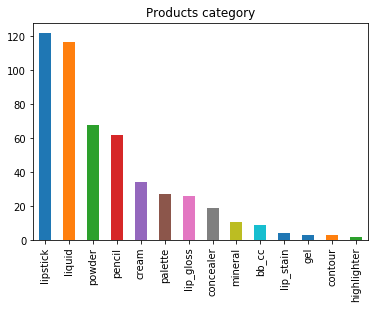

In [66]:
df.category.value_counts().plot(kind='bar', title='Products category')
plt.show()

Distribution of product types column:

In [4]:
pd.value_counts(df['product_type'].values, sort=True)

foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
dtype: int64

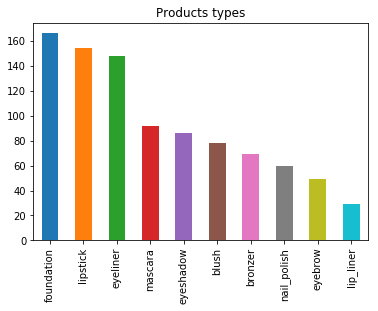

In [67]:
df.product_type.value_counts().plot(kind='bar', title='Products types')
plt.show()

The largest amount of products is foundation, lipstick and eyeliner.

##### How many products have rating above 4?

In [13]:
df['product_type'].where(df['rating'] > 4).count()

227

Only numerica data:

In [19]:
df_two = df._get_numeric_data()
df_two.head()

,id,price,rating
0,1048,5.0,NaN
1,1047,5.5,NaN
2,1046,5.5,NaN
3,1045,12.0,NaN
4,1044,26.0,NaN


Exchange of columns:

In [20]:
df_two = df_two[['rating', 'price', 'id']]
df_two.head()

,rating,price,id
0,NaN,5.0,1048
1,NaN,5.5,1047
2,NaN,5.5,1046
3,NaN,12.0,1045
4,NaN,26.0,1044


### Indexing, selection, filtering

The first two observations from the frame (two ways)

In [21]:
df.head(2)
df.iloc[0:2,]

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"


In [22]:
# last three observations
df.iloc[-3:,]

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
928,physicians formula,NaN,NaN,Physicians Formula Organic Wear Lash Boosting ...,3,Physicians Formula Organic Wear Lash Boosting ...,15.79,NaN,mascara,3.7,"['Gluten Free', 'Natural']"
929,NaN,NaN,NaN,Voluminous - Volume Building Waterproof Mascar...,2,L' Oreal Paris Voluminous Mascara,9.99,NaN,mascara,4.5,[]
930,pure anada,NaN,NaN,"Finally, a natural mascara you can feel good a...",1,Pure Anada Natural Mascara,14.00,NaN,mascara,4.6,"['Canadian', 'Gluten Free', 'Natural']"


##### Selecting specific data from columns:

In [23]:
df.loc[3, ["brand", "category", "price", "rating", "product_type"]]

brand            colourpop
category            liquid
price                   12
rating                 NaN
product_type    foundation
Name: 3, dtype: object

In [24]:
df.loc[[4, 5], ["brand","category", "price", "rating", "product_type"]]

,brand,category,price,rating,product_type
4,boosh,lipstick,26.0,NaN,lipstick
5,deciem,liquid,6.7,NaN,foundation


In [25]:
df2 = df.loc[:, ["brand","category", "price", "rating", "product_type"]]
df2.head()

,brand,category,price,rating,product_type
0,colourpop,pencil,5.0,NaN,lip_liner
1,colourpop,lipstick,5.5,NaN,lipstick
2,colourpop,lipstick,5.5,NaN,lipstick
3,colourpop,liquid,12.0,NaN,foundation
4,boosh,lipstick,26.0,NaN,lipstick


In [34]:
df2.loc[df2['brand'] == 'covergirl'].head()

,brand,category,price,rating,product_type
481,covergirl,NaN,13.99,NaN,bronzer
493,covergirl,NaN,8.99,5.0,bronzer
505,covergirl,powder,13.99,NaN,blush
512,covergirl,powder,13.99,5.0,blush
519,covergirl,powder,8.99,5.0,blush


Price greater than 50:

In [26]:
df2[df2['price'] > 50]

,brand,category,price,rating,product_type
329,dior,palette,65.00,NaN,eyeshadow
364,dior,lipstick,77.00,NaN,lipstick
386,benefit,NaN,75.00,NaN,bronzer
454,smashbox,NaN,55.00,NaN,eyebrow
456,smashbox,palette,52.00,NaN,eyeshadow
549,stila,cream,51.00,NaN,blush
550,stila,cream,51.00,NaN,blush
676,mistura,NaN,56.49,2.6,eyeshadow
689,pacifica,NaN,60.00,4.9,bronzer


Rating greater than 4.0 and price greater than 20: 

In [27]:
df2[(df2['rating'] > 4.0) & (df2['price'] > 20)].head()

,brand,category,price,rating,product_type
486,physicians formula,NaN,20.99,4.7,bronzer
489,NaN,NaN,24.00,5.0,bronzer
490,cargo cosmetics,NaN,29.00,5.0,bronzer
496,dr. hauschka,NaN,45.00,4.6,bronzer
507,cargo cosmetics,NaN,36.00,5.0,bronzer


Rating greater than 4.5 and price less than 10:

In [28]:
df2[(df2['rating'] > 4.5) & (df2['price'] < 10)].head()

,brand,category,price,rating,product_type
493,covergirl,NaN,8.99,5.0,bronzer
519,covergirl,powder,8.99,5.0,blush
522,covergirl,powder,6.99,5.0,blush
528,covergirl,powder,6.99,5.0,blush
536,e.l.f.,powder,9.99,4.7,blush


Observations where the rating between 1 and 3:

In [30]:
df2[df2['rating'].between(1,3)].head()

,brand,category,price,rating,product_type
495,physicians formula,NaN,21.99,2.5,bronzer
511,sante,powder,23.49,3.0,blush
552,nyx,cream,9.99,2.0,blush
556,NaN,cream,15.00,2.3,blush
569,marcelle,NaN,10.99,3.0,lip_liner


### Summary statistics

In [26]:
df2.describe()

,price,rating
count,917.000000,340.000000
mean,16.508593,4.319118
std,11.028035,0.675849
min,0.000000,1.500000
25%,8.990000,4.000000
50%,13.990000,4.500000
75%,22.000000,5.000000
max,77.000000,5.000000


In [27]:
df2['price'].mean()

16.508593238822208

In [54]:
# mean price for each rating 
df2.groupby('rating').mean()

,price
rating,
1.5,10.000000
2.0,12.990000
2.3,15.000000
2.5,13.906667
2.6,56.490000
3.0,13.603846
3.1,15.790000
3.2,15.790000
3.3,11.592000


The distribution of data on charts:

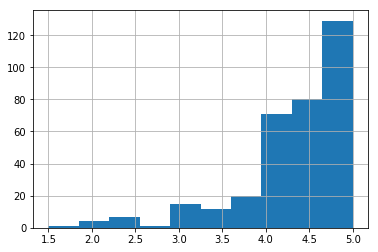

In [59]:
df2['rating'].hist()

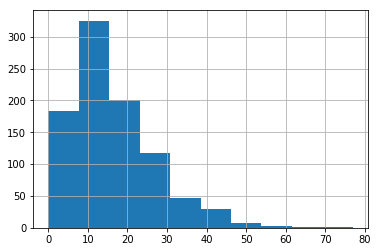

In [60]:
df2['price'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4D0B8A978>,
      dtype=object)

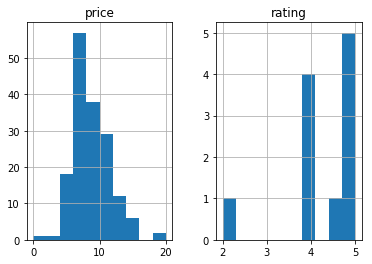

In [61]:
df2[df2['brand'] == 'nyx'].hist()

The largest rating is in the range of 4.5-5.0 but are many missing values in data. The largest price is in the range of 8-20.

##### Corelation:

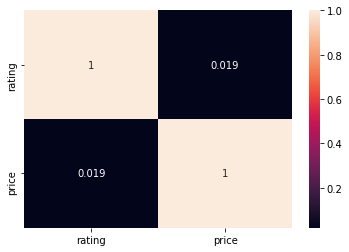

In [72]:
cor = df2[['rating', 'price']].corr()
sns.heatmap(cor, annot=True)

##### The mean price of selected products:

In [74]:
df2.loc[df2['brand'] == 'maybelline'].mean()

price     11.138148
rating     4.082609
dtype: float64

In [75]:
df2.loc[df2['category'] == 'lipstick'].mean()

price     14.444050
rating     4.464865
dtype: float64

In [77]:
df2.groupby('product_type')[['price']].mean()

,price
product_type,
blush,17.155395
bronzer,22.738841
eyebrow,20.963542
eyeliner,12.624014
eyeshadow,17.978929
foundation,20.672407
lip_liner,9.859655
lipstick,14.517647
mascara,14.193596


In [79]:
df2.groupby('product_type')[['rating']].mean()

,rating
product_type,
blush,4.419444
bronzer,4.608333
eyebrow,NaN
eyeliner,4.230189
eyeshadow,4.392500
foundation,4.218519
lip_liner,4.363636
lipstick,4.435000
mascara,4.281633


### Data Aggregation

Number of observations in the column:

In [98]:
df2.groupby('category').size()

category
bb_cc            9
concealer       19
contour          3
cream           34
gel              3
highlighter      2
lip_gloss       26
lip_stain        4
lipstick       122
liquid         117
mineral         11
palette         27
pencil          62
powder          68
dtype: int64

Max and mean price for each type of product:

In [87]:
df2.groupby('product_type')['price'].agg(['max', 'mean'])

,max,mean
product_type,,
blush,51.00,17.155395
bronzer,75.00,22.738841
eyebrow,55.00,20.963542
eyeliner,36.00,12.624014
eyeshadow,65.00,17.978929
foundation,49.00,20.672407
lip_liner,20.49,9.859655
lipstick,77.00,14.517647
mascara,33.00,14.193596


Max, mean price and rating for each type of product:

In [95]:
df2.groupby('product_type')['price', 'rating'].agg(['max', 'mean'])

price            rating          
                max       mean    max      mean
product_type                                   
blush         51.00  17.155395    5.0  4.419444
bronzer       75.00  22.738841    5.0  4.608333
eyebrow       55.00  20.963542    NaN       NaN
eyeliner      36.00  12.624014    5.0  4.230189
eyeshadow     65.00  17.978929    5.0  4.392500
foundation    49.00  20.672407    5.0  4.218519
lip_liner     20.49   9.859655    5.0  4.363636
lipstick      77.00  14.517647    5.0  4.435000
mascara       33.00  14.193596    5.0  4.281633
nail_polish   22.49  12.901500    5.0  4.118182

In [97]:
df2.groupby('product_type').agg({'price': [np.size, np.mean, np.max ]})

price                  
               size       mean   amax
product_type                         
blush          78.0  17.155395  51.00
bronzer        69.0  22.738841  75.00
eyebrow        49.0  20.963542  55.00
eyeliner      148.0  12.624014  36.00
eyeshadow      86.0  17.978929  65.00
foundation    166.0  20.672407  49.00
lip_liner      29.0   9.859655  20.49
lipstick      154.0  14.517647  77.00
mascara        92.0  14.193596  33.00
nail_polish    60.0  12.901500  22.49

How many types of products offerr each brand:

In [58]:
df2.groupby('brand').count()[['product_type']]

,product_type
brand,
almay,14
alva,1
anna sui,6
annabelle,11
benefit,41
boosh,1
burt's bees,2
butter london,2
c'est moi,4


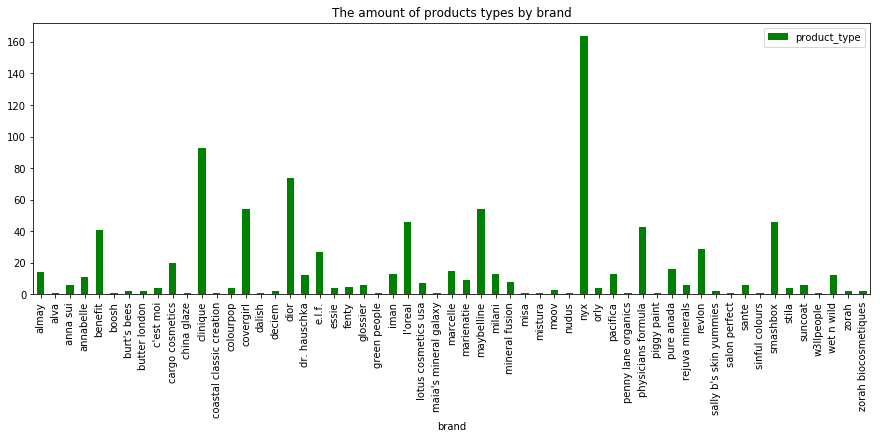

In [76]:
df2.groupby('brand').count()[['product_type']].plot(kind='bar',figsize=(15,5), color=['green'], title='The amount of products types by brand')
plt.show()

The largest type of products offer brand "Nyx" and "Clinique".

### Sorting

In [105]:
df2.sort_values(by='brand').head()

,brand,category,price,rating,product_type
635,almay,liquid,17.29,4.5,foundation
886,almay,NaN,10.99,4.3,mascara
661,almay,NaN,10.99,4.5,eyeshadow
529,almay,powder,14.49,4.0,blush
649,almay,NaN,10.49,4.0,eyeshadow


In [103]:
df.sort_values(by='rating', ascending=False).head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
472,nyx,NaN,NaN,NYX Mosaic Powder Blush is a medley of that cr...,508,NYX Mosaic Powder Blush Paradise,10.49,NaN,bronzer,5.0,[]
750,marcelle,liquid,NaN,\r\n Marcelle Kajal Kohl Eyeliner is of...,201,Marcelle Kajal Kohl Eyeliner Blackest Black,11.99,NaN,eyeliner,5.0,"['Canadian', 'Gluten Free']"
758,physicians formula,liquid,NaN,Physicians Formula's intense and richly pigmen...,192,Physicians Formula Shimmer Strips Kohl Kajal E...,14.79,NaN,eyeliner,5.0,['Gluten Free']
761,physicians formula,liquid,NaN,Physicians Formula Shimmer Strips Kohl Kajal E...,189,Physicians Formula Shimmer Strips Kohl Kajal E...,14.79,NaN,eyeliner,5.0,['Gluten Free']
767,e.l.f.,liquid,NaN,e.l.f. Intense Ink Eyeliner quick-dry formula ...,183,e.l.f. Intense Ink Eyeliner,3.99,NaN,eyeliner,5.0,[]


In [110]:
df2.groupby(['product_type'])[['price']].mean().sort_values('price', ascending=False)

,price
product_type,
bronzer,22.738841
eyebrow,20.963542
foundation,20.672407
eyeshadow,17.978929
blush,17.155395
lipstick,14.517647
mascara,14.193596
nail_polish,12.901500
eyeliner,12.624014


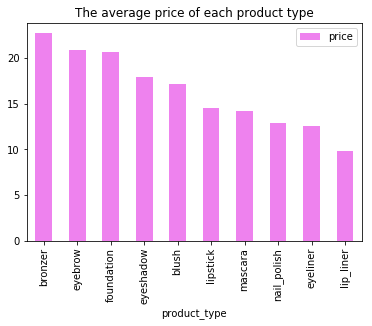

In [82]:
df2.groupby(['product_type'])[['price']].mean().sort_values('price', ascending=False).plot(kind='bar', 
                                                color=['violet'], title='The average price of each product type')
plt.show()

It is seen that average price of products are similar.

## Cleaning data

Missing data in each column:

In [103]:
df.isna().sum()

brand            12
category        424
currency        563
description      25
id                0
name              0
price            14
price_sign      563
product_type      0
rating          591
tag_list          0
dtype: int64

In [66]:
# delate unnecessary columns
df_new= df.drop(['category','currency', 'description', 'id', 'price_sign'], axis=1)
df_new.head()

,brand,name,price,product_type,rating,tag_list
0,colourpop,Lippie Pencil,5.0,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,Blotted Lip,5.5,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,Lippie Stix,5.5,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,No Filter Foundation,12.0,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,Lipstick,26.0,lipstick,NaN,"['Organic', 'Chemical Free']"


In [67]:
#delate rows with missing data 
df_new.dropna(subset=['brand'], inplace=True)

##### Completing missing values

In [68]:
mean_df = df_new['price'].mean()
mean_df

16.448066298342507

In [69]:
df_new['price'] = df_new['price'].fillna(mean_df)

In [71]:
df_new['rating'] = df_new['rating'].fillna('0')

In [73]:
df_new['rating'].value_counts().sort_values(ascending=False)

0      587
5.0     84
4.0     52
4.5     27
4.3     23
4.8     21
4.7     17
4.4     15
4.6     13
3.0     13
4.2     12
3.8      9
2.5      6
3.9      5
3.7      5
4.1      5
3.3      5
4.9      5
2.0      4
3.4      3
3.5      3
1.5      1
2.6      1
3.6      1
3.2      1
3.1      1
Name: rating, dtype: int64

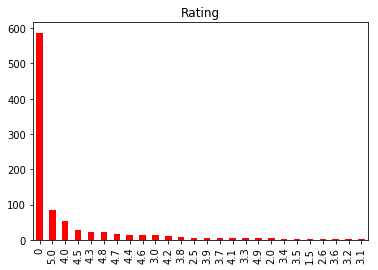

In [75]:
df_new['rating'].value_counts().sort_values(ascending=False).plot(kind='bar', color=['red'], title='Rating')
plt.show()

In [72]:
df_new.isnull().sum() 

brand           0
name            0
price           0
product_type    0
rating          0
tag_list        0
dtype: int64

In the dataset has no missing values, they have been completed. Missing values in the price column were filled with the average price of the product and in the rating column they were replaced by 0.